In [41]:
# dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
ardd_path = "ardd_fatalities_2023.csv"

# assign csv info into ardd
ardd = pd.read_csv(ardd_path,header=0,low_memory=False,dtype={"Speed Limit":"string",
                                                               "National Remoteness Areas": "string",
                                                               "SA4 Name 2021": "string",
                                                               "National LGA Name 2021": "string",
                                                               "National Road Type": "string",
                                                                "Year": "string"})

# preview data
ardd.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20237008,NT,10,2023,Friday,NaN,Single,No,No,No,...,24,<NA>,<NA>,<NA>,<NA>,No,No,17_to_25,Weekend,Night
1,20234009,SA,10,2023,Saturday,3:00,Single,No,No,No,...,22,Outer Regional Australia,Barossa - Yorke - Mid North,Yorke Peninsula,Local Road,No,No,17_to_25,Weekend,Night
2,20233087,Qld,10,2023,Saturday,3:00,Single,No,No,No,...,19,Inner Regional Australia,Wide Bay,Gympie,Collector Road,No,No,17_to_25,Weekend,Night
3,20233149,Qld,10,2023,Sunday,3:00,Single,No,No,No,...,37,Inner Regional Australia,Wide Bay,Bundaberg,Local Road,No,No,26_to_39,Weekend,Night
4,20233190,Qld,10,2023,Sunday,3:00,Multiple,No,No,No,...,35,Outer Regional Australia,Mackay - Isaac - Whitsunday,Mackay,Sub-arterial Road,No,No,26_to_39,Weekend,Night


In [44]:
# remove unwanted columns "National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"
clean_ardd = ardd.drop(columns=["National Remoteness Areas","SA4 Name 2021","National LGA Name 2021","National Road Type", "Christmas Period", "Bus Involvement", "Heavy Rigid Truck Involvement", "Articulated Truck Involvement", "Easter Period"])

# gather latest and earliest year for the title in graphs
min_year = clean_ardd["Year"].min()
max_year = clean_ardd["Year"].max()

# replace the "_" with " " in column "Age Group"
clean_ardd["Age Group"] = clean_ardd["Age Group"].str.replace("_"," ")

# remove the ":" in column "Time"
clean_ardd["Time"] = clean_ardd["Time"].str.replace(":","")

# replace "-9" with Unknown as described in the data dictionary
clean_ardd=clean_ardd.replace({"-9":"Unknown"}).replace({-9: "Unknown"})

# change data type from String to Int
clean_ardd['Year'] = clean_ardd['Year'].astype(int)

# remove rows with Unknown time
clean_ardd = clean_ardd[clean_ardd.Time != "Unknown"]
clean_ardd.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Day of week,Time of day
0,20237008,NT,10,2023,Friday,NaN,Single,Unknown,Driver,Female,24,17 to 25,Weekend,Night
1,20234009,SA,10,2023,Saturday,300,Single,100,Driver,Male,22,17 to 25,Weekend,Night
2,20233087,Qld,10,2023,Saturday,300,Single,80,Driver,Male,19,17 to 25,Weekend,Night
3,20233149,Qld,10,2023,Sunday,300,Single,60,Passenger,Male,37,26 to 39,Weekend,Night
4,20233190,Qld,10,2023,Sunday,300,Multiple,100,Motorcycle rider,Male,35,26 to 39,Weekend,Night


# Fatality by State

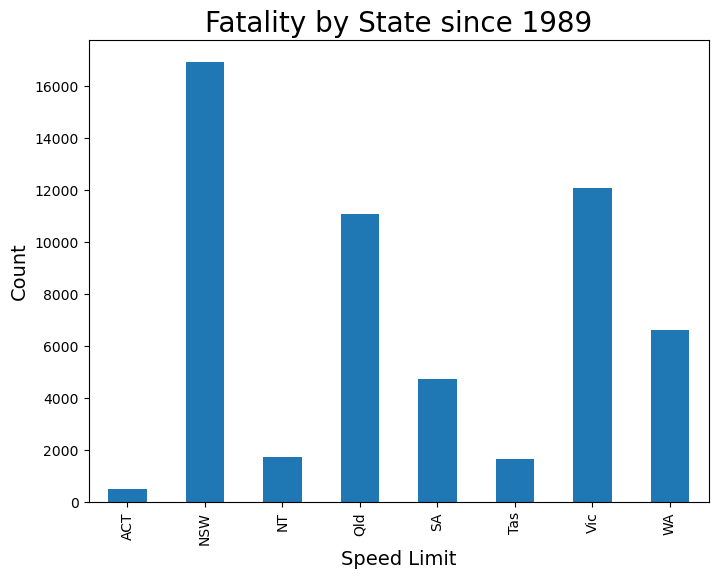

In [45]:
# capture state and Crash ID into new dataframe
state_year_df = clean_ardd[["State","Year"]]

# group by the state and count the number of fatality
groupby_state = state_year_df.groupby(["State"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold State and Count
groupby_state_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_state_df.plot(kind="bar", figsize=(8,6), legend=False)

# Set a Title and labels
plt.title(f"Fatality by State since {min_year}", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.show()

In [48]:
# NSW dataframe
NSW_df = clean_ardd.loc[clean_ardd["State"] == "NSW", :]
NSW_df.head(5)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,Age Group,Day of week,Time of day
13,20231095,NSW,10,2023,Wednesday,1840,Single,70,Driver,Male,40,40 to 64,Weekday,Night
15,20231059,NSW,10,2023,Friday,2308,Single,80,Driver,Male,44,40 to 64,Weekend,Night
20,20231105,NSW,10,2023,Friday,1800,Multiple,70,Motorcycle rider,Male,55,40 to 64,Weekend,Night
33,20231013,NSW,10,2023,Monday,1630,Multiple,100,Passenger,Male,18,17 to 25,Weekday,Day
36,20231113,NSW,10,2023,Saturday,005,Single,100,Driver,Male,75,75 or older,Weekend,Night


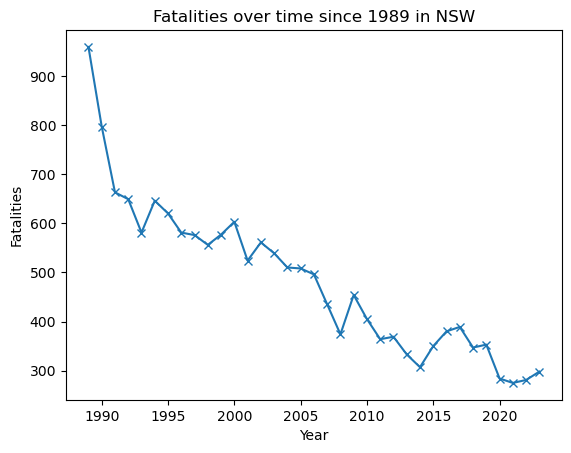

In [50]:
# capture Year and state NSW into new dataframe
state_year_df = NSW_df[["State","Year"]]

# group by the Year and count the number of fatality
groupby_state = state_year_df.groupby(["Year"])

# calculate count
count = groupby_state["Year"].count()
                                       
# create a dataframe to hold Year and Count
groupby_year_df = pd.DataFrame({"Count": count
                           })

plt.plot(groupby_year_df, marker = "x")
plt.title(f"Fatalities over time since {min_year} in NSW")
plt.ylabel("Fatalities")
plt.xlabel("Year")
plt.show()

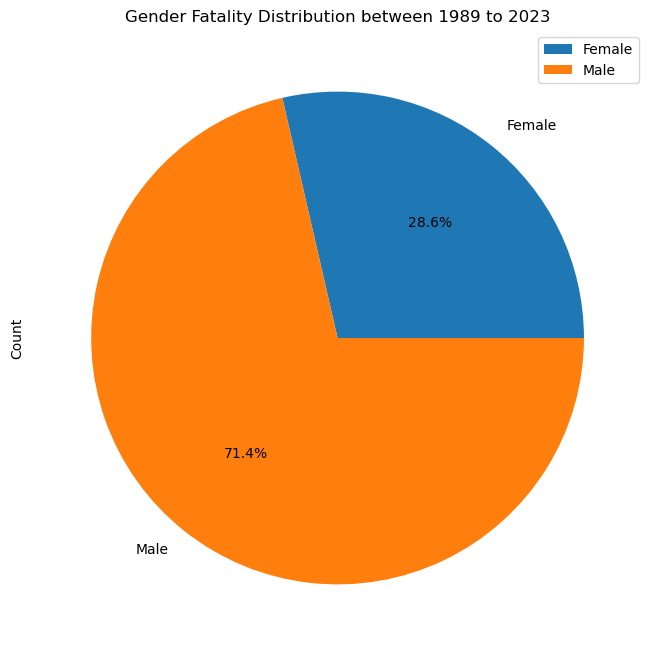

In [23]:
# capture the requried Gender and Crash ID into gender_df
gender_df = NSW_df[["Crash ID","Gender"]]
groupby_gender = gender_df.groupby(["Gender"])

# calculate count
count = groupby_gender["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0,0.1,0.1,0.1]
plot = groupby_gender_df.plot.pie(y="Count",explode = None, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Gender Fatality Distribution between {min_year} to {max_year} in NSW")
plt.show()

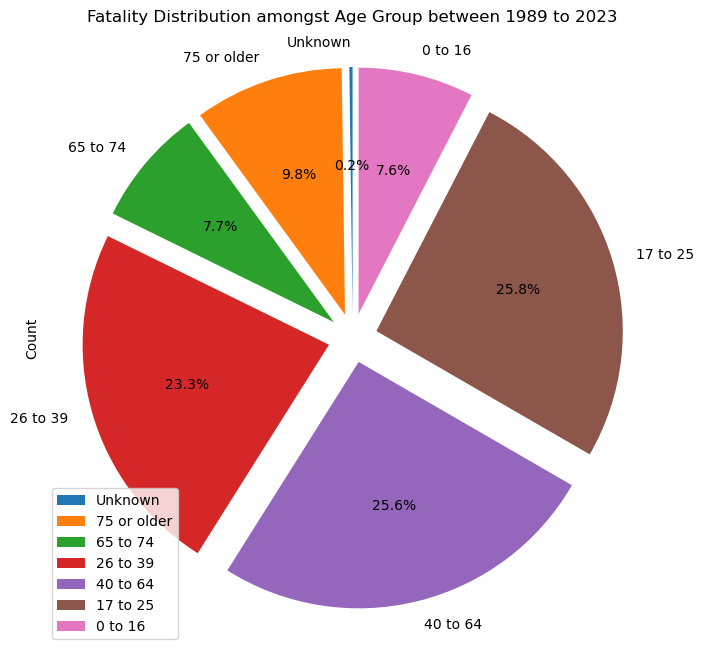

In [51]:
# Generate a pie plot showing the distribution of age group versus crashes using pandas
ageg_df = clean_ardd[["Crash ID","Age Group"]]
groupby_ageg = ageg_df.groupby(["Age Group"])

# calculate count
count = groupby_ageg["Crash ID"].count()

# create a dataframe to hold Age Group and Count
groupby_ageg_df = pd.DataFrame({"Count": count
                           })

groupby_ageg_df = groupby_ageg_df.reindex(['Unknown','75 or older', '65 to 74', '26 to 39', '40 to 64', '17 to 25' ,'0 to 16'])

# set the explode value
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plot = groupby_ageg_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=90, autopct="%1.1f%%")
plt.title(f"Fatality Distribution amongst Age Group between {min_year} to {max_year}")


plt.show()

## Day of Week vs. Fatality

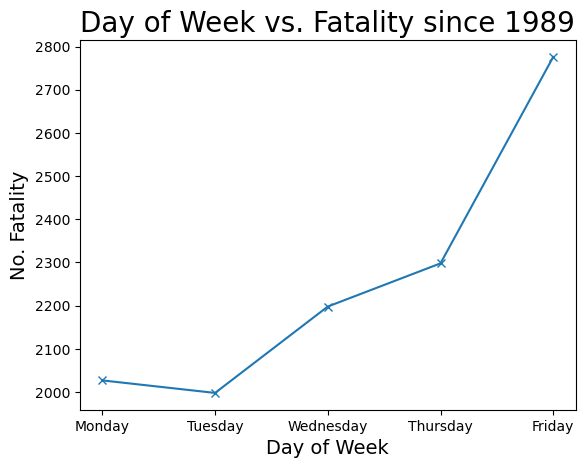

In [34]:
# Generate a pie plot showing the distribution of dayweek versus number of crashes using pandas
dc_df = NSW_df[["Dayweek","Crash ID"]]

# group by the Day of Week and count the number of fatality
groupby_week = dc_df.groupby(["Dayweek"])

# calculate count
count = groupby_week["Crash ID"].count()

# create a dataframe to hold Day of week and Count
groupby_week_df = pd.DataFrame({"Count": count
                           })

# manually rearrange the Day of Week index
groupby_week_df = groupby_week_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday'])

# plot the graph
plt.plot(groupby_week_df, marker = "x")

plt.title(f"Day of Week vs. Fatality since {min_year}",fontsize =20)
plt.ylabel("No. Fatality",fontsize =14)
plt.xlabel("Day of Week",fontsize =14)
plt.show()

## Speed limit vs. No. of Deaths

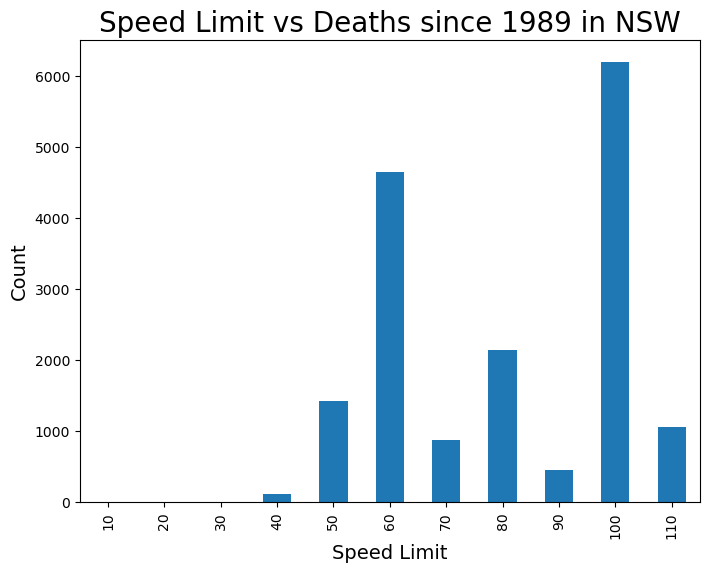

In [54]:
# capture Speed Limit and Crash ID into new dataframe
spdlmt_df = NSW_df[["Speed Limit","Crash ID"]]

# remove "unknown", "unspecified" and "<40"
spdlmt_df = spdlmt_df[(spdlmt_df["Speed Limit"] != "Unknown") 
                      & (spdlmt_df["Speed Limit"] != "Unspecified") 
                     & (spdlmt_df["Speed Limit"] != "<40") ]

# uniform the data type to INT as some of it is in STR
spdlmt_df["Speed Limit"] = spdlmt_df["Speed Limit"].astype(int)


# group by the Speed Limit and count the number of fatality
groupby_spdlmt = spdlmt_df.groupby(["Speed Limit"])

# calculate count
count = groupby_spdlmt["Crash ID"].count()

# create a dataframe to hold speed limit and Count
groupby_spdlmt_df = pd.DataFrame({"Count": count
                           })
# create a bar chart of the data
groupby_spdlmt_df.plot(kind="bar", figsize=(8,6), legend=False)

# Set a Title and labels
plt.title(f"Speed Limit vs Deaths since {min_year} in NSW", fontsize=20)
plt.ylabel("Count",fontsize=14)
plt.xlabel("Speed Limit",fontsize=14)
plt.show()